In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *

# VARIABLES
lista_Sin        = []
lista_Cos        = []
lista_Sin_mux    = []   # Listas
lista_Cos_mux    = []
lista_Sin_Cuanti = []
lista_Cos_Cuanti = []

prueba           = []

N           = 1024                   # Numero de muestras
frec        = 1.0/((1.0/100.0e6)*N)  # Frecuencia en base al num de meustras para un Fsamp = 100Mhz

#___Generacion de 1/4 de onda de Sen y Cos___#
for t in range(N):
    valor = np.sin((np.pi/2.0)*frec*(t/100.0e6))
    lista_Sin.append(valor)
 
for t in range(N):
    valor = np.cos((np.pi/2.0)*frec*(t/100.0e6))
    lista_Cos.append(valor)

#___Cuantificacion de los Valores____#
lista_Sin = list(lista_Sin)
lista_Cos = list(lista_Cos)

lista_Sin = arrayFixedInt(8, 6, lista_Sin, signedMode='S', roundMode='round', saturateMode='saturate')
lista_Cos = arrayFixedInt(8, 6, lista_Cos, signedMode='S', roundMode='round', saturateMode='saturate')

for ptr in range(len(lista_Sin)):
    lista_Sin[ptr]       = lista_Sin[ptr].fValue
    lista_Cos[ptr]       = lista_Cos[ptr].fValue


#___Relleno de ceros para valores menores a 4 byte___#
for i in range (len(lista_Sin)):

    var = hex(int(lista_Sin[i]*(2**6)))

    if (len(var) > 3): prueba.append(var) # Se convierte de coma fija a entero

    elif(len(var) == 3): 
        var = hex(int(lista_Sin[i]*(2**6))).split('0x')[1]    
        var = var.zfill(2)
        prueba.append('0x'+var)

# REGRESETVALUEDIF = '{}\'b{}'.format(REGSIZEDIFF,(bin(int('0x0',16)).lstrip("0b")).zfill(REGSIZEDIFF))



4096
4096


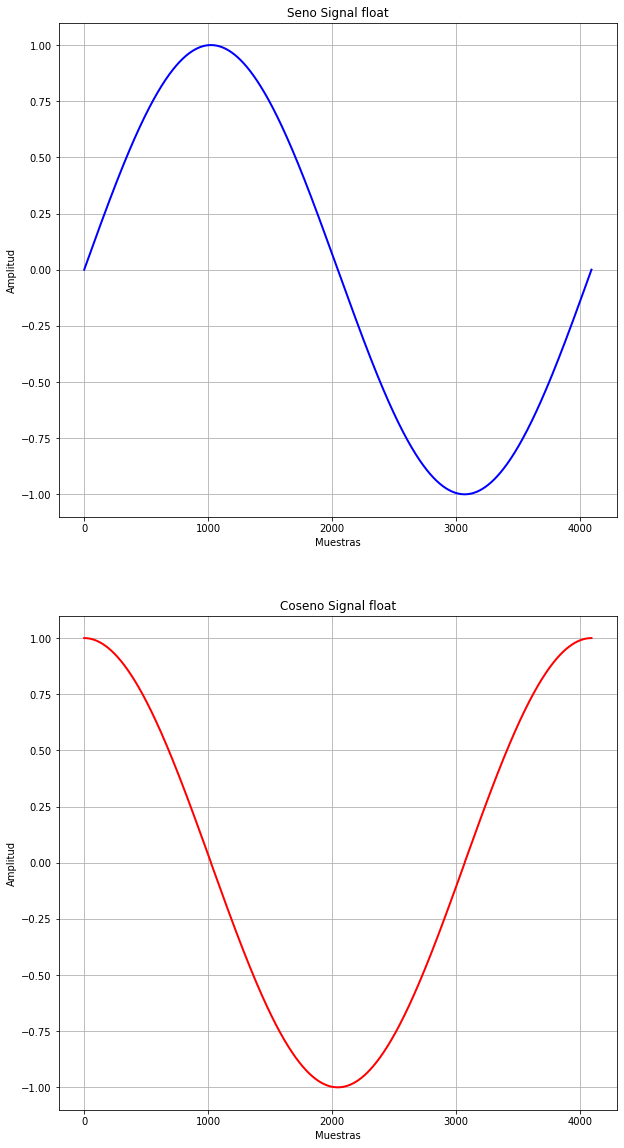

In [65]:
# |_______________________SinyCosTab_V1_2b_____________________________|
# | Se grafica un periodo completo de un seno y un coseno tomando como |
# | frecuencia de muestreo 100Mhz lo cual la frec maxima a muestrear   |   
# | sera de 50Mhz segun el teorema de Nyquist.                         |      
# | Se busca realizar un muestreo de 1024 valores lo cual dara como    |
# | frecuencia minia a muestrear para 1024 sera:                       |
# | Tsampl = 1/100MHz --> 10ns                                         |
# | Tmuestras = 10ns * 1024muestras --> 10.24us                        | 
# | Frecmin = 1/10.24us --> 97.65625kHz                                |
# | Aparte se cuantiza los valores para ser usados en verilog y se     |
# | compara con los resultados obtenidos en coma flotante              |
# | ################################################################## |
# | NUEVO:                                                             |
# | Se toma 1024 valores en un cuarto de recorrido de 2Pi es decir     |
# | esto da como ventaja trabajar con el cuarto de onda obtenido y     |
# | espejando sus valores y negando se puede armar la onda sin y cos   |
# | completa generando asi 4096 datos dando como resultado una         |
# | una Frecmin = 24.4140625kHz                                        |
# | ###################################################################|
# | NUEVO:                                                             |
# | Simulacion de multiplexores para el armado de la onda completa     |
# | para posterior uso en verilog                                      |
# |____________________________________________________________________|  
import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *

lista_Sin        = []
lista_Cos        = []
lista_Sin_mux    = []   #Prueba para mux
lista_Cos_mux    = []
lista_Sin_Cuanti = []
lista_Cos_Cuanti = []

M           = 1024*4
N           = 1024
frec        = 1.0/((1.0/100.0e6)*N)

# print('La frecuencia es: ', frec)

for t in range(N):
    valor = np.sin((np.pi/2.0)*frec*(t/100.0e6))
    lista_Sin.append(valor)
 
for t in range(N):
    valor = np.cos((np.pi/2.0)*frec*(t/100.0e6))
    lista_Cos.append(valor)

#____mux de uso de mux para generar onda completa Seno____#
count = 0
n = 0
for i in range(M):

    if (i < 1024):                            # 1er mux
        lista_Sin_mux.append(lista_Sin[n])    # Se recorre la lista normalmente hasta el ultimo valor
        n = n + 1 

    if (i > 1023 and i < 2048):                        
        n = n - 1        
        lista_Sin_mux.append(lista_Sin[n])    # Ahora se recorre la lista en sentido inverso (2do cuarto) 

    if (i > 2047 and i < 3072):                  # 3er mux  
        lista_Sin_mux.append(lista_Sin[n]*-1)   
        n = n + 1 

    if (i > 3071 and i < 4096 ):              # 4to mux
        n = n - 1 
        lista_Sin_mux.append(lista_Sin[n]*-1) # por ultimo se recorre en sentido inverso y negando valores (4to cuarto)    



#____mux de uso de mux para generar onda completa Cos____#
n = 0
for i in range(M):

    if (i < 1024):                            # 1er mux
        lista_Cos_mux.append(lista_Cos[n])    # Se recorre la lista normalmente hasta el ultimo valor
        n = n + 1 

    if (i > 1023 and i < 2048):                  # 2do mux
        n = n - 1
        lista_Cos_mux.append(lista_Cos[n]*-1)    # Ahora se recorre la lista en sentido inverso y se niega los valores (2do cuarto)
  
    if (i > 2047 and i < 3072):                 # 3er mux                                                                                                                                      
        lista_Cos_mux.append(lista_Cos[n]*-1)   # Se recorrer en sentido normal y negando los valores (3er cuarto)   
        n = n + 1 

    if (i > 3071 and i < 4096 ):                # 4to mux
        n = n - 1 
        lista_Cos_mux.append(lista_Cos[n])       # por ultimo se recorre en sentido inverso (4to cuarto)    



print(len(lista_Sin_mux))
print(len(lista_Cos_mux))

# #____Cuantizado____#
# lista_Sin_mux = list(lista_Sin_mux)
# lista_Cos_mux = list(lista_Cos_mux)
# lista_Sin_Cuanti = arrayFixedInt(8, 6, lista_Sin_mux, signedMode='S', roundMode='round', saturateMode='saturate')
# lista_Cos_Cuanti = arrayFixedInt(8, 6, lista_Cos_mux, signedMode='S', roundMode='round', saturateMode='saturate')

# for ptr in range(len(lista_Sin_Cuanti)):
#     lista_Sin_Cuanti[ptr]       = lista_Sin_Cuanti[ptr].fValue
#     lista_Cos_Cuanti[ptr]       = lista_Cos_Cuanti[ptr].fValue

##################################################################

# for i in range (1024):

#     if (i > 1000):
#         print(lista_Cos[i])

#____Plot valores flotantes____#
plt.figure(figsize=[10,20])
plt.subplot(2,1,1)
plt.title('Seno Signal float')
plt.plot(lista_Sin_mux, 'b-',linewidth=2.0)
plt.grid(True)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.subplot(2,1,2)
plt.title('Coseno Signal float')
plt.plot(lista_Cos_mux, 'r-',linewidth=2.0)
plt.grid(True)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

# #____Plot del cuantizado____#
# plt.figure(figsize=[10,20])
# plt.subplot(2,1,1)
# plt.title('Seno Signal Cuanti')
# plt.plot(lista_Sin, 'b-',linewidth=2.0)
# plt.grid(True)
# plt.xlabel('Muestras')
# plt.ylabel('Amplitud')
# plt.subplot(2,1,2)
# plt.title('Coseno Signal Cuanti')
# plt.plot(lista_Cos_Cuanti, 'r-',linewidth=2.0)
# plt.grid(True)
# plt.xlabel('Muestras')
# plt.ylabel('Amplitud')
# plt.show()

# #____Plot Superpuestos____#
# plt.figure(figsize=[10,20])
# plt.subplot(2,1,1)
# plt.title('Seno Signal Comparacion')
# plt.plot(lista_Sin_mux, 'r-',linewidth=5.0)
# plt.plot(lista_Sin_Cuanti, 'b-',linewidth=2.0)
# plt.grid(True)
# plt.xlabel('Muestras')
# plt.ylabel('Amplitud')
# plt.subplot(2,1,2)
# plt.title('Coseno Signal Comparacion')
# plt.plot(lista_Cos_mux, 'b-',linewidth=5.0)
# plt.plot(lista_Cos_Cuanti, 'r-',linewidth=2.0)
# plt.grid(True)
# plt.xlabel('Muestras')
# plt.ylabel('Amplitud')
# plt.show()


In [1]:
# |_______________________SinyCosTab2__________________________________|
# | Se grafica un periodo completo de un seno y un coseno tomando como |
# | frecuencia de muestreo 100Mhz lo cual la frec maxima a muestrear   |   
# | sera de 50Mhz segun el teorema de Nyquist.                         |      
# | Se busca realizar un muestreo de 1024 valores lo cual dara como    |
# | frecuencia minia a muestrear para 1024 sera:                       |
# | Tsampl = 1/100MHz --> 10ns                                         |
# | Tmuestras = 10ns * 1024muestras --> 10.24us                        | 
# | Frecmin = 1/10.24us --> 97.65625kHz                                |
# | Aparte se cuantiza los valores para ser usados en verilog y se     |
# | compara con los resultados obtenidos en coma flotante              |
# | ################################################################## |
# | NUEVO:                                                             |
# | Se toma 1024 valores en un cuarto de recorrido de 2Pi es decir     |
# | esto da como ventaja trabajar con el cuarto de onda obtenido y     |
# | espejando sus valores y negando se puede armar la onda sin y cos   |
# | completa generando asi 4096 datos dando como resultado una         |
# | una Frecmin = 24.4140625kHz                                        |
# | ################################################################## |
# | NUEVO:                                                             |
# | Simulacion de multiplexores para el armado de la onda completa     |
# | para posterior uso en verilog                                      |
# | ################################################################## |
# | |   
# |____________________________________________________________________|  

import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *

# VARIABLES
lista_Sin        = []
lista_Cos        = []
lista_Sin_mux    = []   # Listas
lista_Cos_mux    = []
lista_Sin_Cuanti = []
lista_Cos_Cuanti = []

N           = 1024                   # Numero de muestras
frec        = 1.0/((1.0/100.0e6)*N)  # Frecuencia en base al num de meustras para un Fsamp = 100Mhz

#___Generacion de 1/4 de onda de Sen y Cos___#
for t in range(N):
    valor = np.sin((np.pi/2.0)*frec*(t/100.0e6))
    lista_Sin.append(valor)
 
for t in range(N):
    valor = np.cos((np.pi/2.0)*frec*(t/100.0e6))
    lista_Cos.append(valor)

#___Cuantificacion de los Valores____#
lista_Sin = list(lista_Sin)
lista_Cos = list(lista_Cos)

lista_Sin = arrayFixedInt(8, 6, lista_Sin, signedMode='S', roundMode='round', saturateMode='saturate')
lista_Cos = arrayFixedInt(8, 6, lista_Cos, signedMode='S', roundMode='round', saturateMode='saturate')

for ptr in range(len(lista_Sin)):
    lista_Sin[ptr]       = lista_Sin[ptr].fValue
    lista_Cos[ptr]       = lista_Cos[ptr].fValue

print(len(lista_Sin))
print(len(lista_Cos))

#___Creacion de archivo txt para RTL___#
archivo = open('CuartoSin.dat', '+w') #con +w si no existe el archivo se lo crea

for i in range(len(lista_Sin)):

    valSin = hex(int(lista_Sin[i]*(2**6)))

    if (len(valSin) > 3): archivo.write(valSin)
    elif(len(valSin) == 3):
        valSin = hex(int(lista_Sin[i]*(2**6))).split('0x')[1]    
        valSin = valSin.zfill(2)        
        archivo.write('0x' + valSin)

    archivo.write('\n')
    
print("Writing complete Sin")
archivo.close()

archivo = open('CuartoCos.dat', '+w') #con +w si no existe el archivo se lo crea
for i in range(len(lista_Cos)):

    valCos = hex(int(lista_Cos[i]*(2**6)))

    if (len(valCos) > 3): archivo.write(valCos)
    elif(len(valCos) == 3):
        valCos = hex(int(lista_Cos[i]*(2**6))).split('0x')[1]    
        valCos = valCos.zfill(2)        
        archivo.write('0x' + valCos)

    archivo.write('\n')

print("Writing complete Cos")
print()
archivo.close()

#_____________FUNCION DE PRUEBA_____________#
def ArchiveFilterBeta(symb_out0I , symb_out0Q):

#REVISARRRRRRRRRRR
    #___Creacion de archivo txt para RTL___#
    archivo = open('FilterI.dat', '+w') #con +w si no existe el archivo se lo crea

    for i in range(1024):

        valI = hex(int(symb_out0I[i]*(2**6)))

        if (len(valI) > 3): archivo.write(valI)
        elif(len(valI) == 3):
            valI = hex(int(symb_out0I[i]*(2**6))).split('0x')[1]    
            valI = valI.zfill(2)        
            archivo.write('0x' + valI)
        archivo.write('\n')
        
    print("Writing complete FilterI")
    archivo.close()

    archivo = open('FilterQ.dat', '+w') #con +w si no existe el archivo se lo crea

    for i in range(1024):

        valQ = hex(int(symb_out0Q[i]*(2**6)))

        if (len(valQ) > 3): archivo.write(valQ)
        elif(len(valQ) == 3):
            valQ = hex(int(symb_out0Q[i]*(2**6))).split('0x')[1]    
            valQ = valQ.zfill(2)        
            archivo.write('0x' + valQ)
        archivo.write('\n')

    print("Writing complete FilterQ")
    print()
    print()





1024
1024
Writing complete Sin
Writing complete Cos



Writing complete Sin
Writing complete Cos

Writing complete FilterI
Writing complete FilterQ


Cantidad de pasos:  1
4096
4096
1.078125
1.15625
1.203125
1.0
0.578125
0.0
-0.590576171875
-1.015625
-1.215576171875
-1.19140625
-1.102783203125
-0.984375
-0.931884765625
-0.88330078125
-0.931884765625
-0.984375
-1.09619140625
-1.1953125
-1.22802734375
-1.03125
-0.60302734375
-0.0390625
0.56005859375
1.03125
1.37060546875
1.4521484375
1.391845703125
1.046875
0.566650390625
-0.04443359375
-0.616943359375
-1.046875
-1.234619140625
-1.1875
-1.077880859375
-0.953125
-0.9013671875
-0.919921875
-1.0107421875
-1.0625
-1.0693359375
-1.029296875
-1.0380859375
-1.0625
-1.1357421875
-1.171875
-1.140869140625
-0.921875
-0.515869140625
-0.01416015625
Punto de partida Q:  3
Punto de partida I:  3
Constelacion rotada
valor de posicion Q:  3
valor de posicion I:  3
posicion optimaQ:  3
posicion optimaI:  3


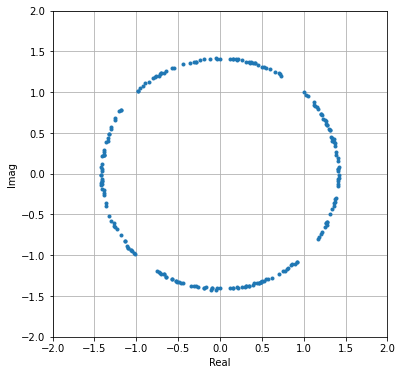

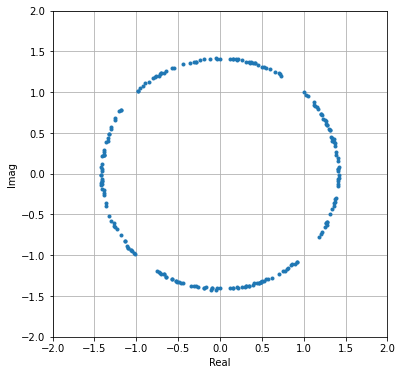

In [1]:
# |______________________________TP9___________________________________|
# | Se tomo como base el tp 6 punto 2 y se le agrego rotacion de       |
# | simbolos, simulando un error en fase con uso de if() como mux      |
# | para posteriormente ser pasado a verilog                           |
# |____________________________________________________________________|

import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *
import SInyCosTab2 as tabla 

#___Variables para simlacion de DSP___#
os             = 4                              # OverSampling
beta           = 0.5                            # Beta                             
Nsymb          = 511                            # Numero de simbolos
T              = 1.0/100e6                      # Periodo de baudio
Ts             = T/os                           # Frecuencia de muestreo
Nfreqs         = 256                            # Cantidad de frecuencias
Nbauds         = 6.0                            # Cantidad de baudios del filtro
PRBSI          = np.array ([1,1,0,1,0,1,0,1,0]) # PRBSI Seed
PRBSQ          = np.array ([1,1,1,1,1,1,1,1,0]) # PRBSQ Seed

SR1            = np.array ([0,0,0,0,0,0])       # Salidas de Signo del FiltroI
SR2            = np.array ([0,0,0,0,0,0])       # Salidas de Signo del FiltroQ

coeficientes   = np.array ( 
    [ 8.95103186e-34,  4.77279499e-03,  1.71488822e-02,  2.27496429e-02,    # Coeficienes del Cos realzado en
    -1.54351892e-16, -5.76127319e-02, -1.20042175e-01, -1.22501738e-01,     # coma flotante
    1.60734027e-15,  2.62503724e-01,  6.00210877e-01,  8.87236072e-01,
    1.00000000e+00,  8.87236072e-01,  6.00210877e-01,  2.62503724e-01,
    -2.94478863e-15, -1.22501738e-01, -1.20042175e-01, -5.76127319e-02,
    7.40915352e-16,  2.27496429e-02,  1.71488822e-02,  4.77279499e-03] 
                           )

berQ                = np.zeros(1024)
berI                = np.zeros(1024)
salidaPRBSI         = []
salidaPRBSQ         = []
salidaPRBSI_sinOS   = []             
salidaPRBSQ_sinOS   = []                
PRBSI_AUX           = []
PRBSQ_AUX           = []
symb_out0Q          = []
symb_out0I          = []
symb_out0I_sinOS    = []
symb_out0Q_sinOS    = []
acumulador_arregloQ = []
acumulador_arregloI = []

contador_berI             = 0
contador_berQ             = 0
acumulador_salida_filtroI = 0
acumulador_salida_filtroQ = 0

#____Cuantizado de los coeficientes del filtro____#
coeficientes = arrayFixedInt(8, 6, coeficientes, signedMode='S', roundMode='round', saturateMode='saturate')
for ptr in range(len(coeficientes)):
    coeficientes[ptr] = coeficientes[ptr].fValue
coeficientes = coeficientes.tolist()   


for j in range(3):
    for i in range(511):

        #___PRBSI___#
        berI     = np.roll(berI,1)
        PRBSI    = np.roll(PRBSI,1)         
        PRBSI[0] = PRBSI[0] ^ PRBSI[5]
        PRBSI_AUX.append(PRBSI[8])
        if PRBSI[8] == 0:
            berI[0] =  0
            salidaPRBSI.append(0)
            salidaPRBSI_sinOS.append(0)
            SalidaPRBSI_actual = 0
        else:
            berI[0] =  1
            salidaPRBSI.append(1)
            salidaPRBSI_sinOS.append(1)
            SalidaPRBSI_actual = 1

        #___PRBSQ___#
        berQ = np.roll(berQ,1)
        PRBSQ    = np.roll(PRBSQ,1)
        PRBSQ[0] = PRBSQ[0] ^ PRBSQ[5]
        PRBSQ_AUX.append(PRBSQ[8])
        if PRBSQ[8] == 0:
            berQ[0] =  0
            salidaPRBSQ.append(0)
            salidaPRBSQ_sinOS.append(0)
            SalidaPRBSQ_actual = 0
        else:
            berQ[0] =  1
            salidaPRBSQ.append(1)
            salidaPRBSQ_sinOS.append(1)
            SalidaPRBSQ_actual = 1

        #___Sobremuestreo___#
        for i in range(os - 1):
            salidaPRBSI.append(0)    
            salidaPRBSQ.append(0)

        #___Toma del signo de los datos a la salida de los filtros___#
        SR1    = np.roll(SR1,1)
        SR1[0] = SalidaPRBSI_actual
        SR2    = np.roll(SR2,1)
        SR2[0] = SalidaPRBSQ_actual
        
        #___Simulacion de filtro polifasico___#
        for entrada_mux in range(4):
            indice = entrada_mux
            for num_mux in range(6):
                salida_mux = coeficientes[indice]
                if (SR1[num_mux] == 0):
                    acumulador_salida_filtroI += salida_mux
                else:
                    acumulador_salida_filtroI += -(salida_mux)
                
                if (SR2[num_mux] == 0):
                    acumulador_salida_filtroQ += salida_mux
                else:
                    acumulador_salida_filtroQ += -(salida_mux)
                indice += 4

            aux_symb_outI = acumulador_salida_filtroI
            aux_symb_outQ = acumulador_salida_filtroQ

            acumulador_salida_filtroI = 0
            acumulador_salida_filtroQ = 0           

            #___Salida de 4 datos por filtro en cada ciclo de relog___#
            symb_out0I.append(aux_symb_outI)
            symb_out0Q.append(aux_symb_outQ)
            
            #___Slizer  y contador de BERQ e I___#
            if (entrada_mux == 0):

                symb_out0I_sinOS.append(aux_symb_outI)
                symb_out0Q_sinOS.append(aux_symb_outQ)

                if aux_symb_outI >= 0:
                    slicerI = 0
                else:
                    slicerI = 1
                contador_berI = contador_berI + (slicerI ^ int(berI[j]))
                
                if aux_symb_outQ >= 0:
                    slicerQ = 0
                else:
                    slicerQ = 1
                contador_berQ = contador_berQ + (slicerQ ^ int(berQ[j]))
                
    #___Busqueda de la latencia minima___#
    acumulador_arregloI.append(contador_berI)
    if (contador_berI == 0):
        print("Latencia minima en I:",j) 
    
    acumulador_arregloQ.append(contador_berQ)
    if (contador_berQ == 0):
        print("Latencia minima en Q:",j)
           
    #___Reseteo de variables___#
    if (j == 1022):
        salidaPRBSI      .clear()
        salidaPRBSQ      .clear()
        salidaPRBSI_sinOS.clear()
        salidaPRBSQ_sinOS.clear()
        PRBSI_AUX        .clear()
        PRBSQ_AUX        .clear()
        symb_out0Q       .clear()
        symb_out0I       .clear()
        symb_out0I_sinOS .clear()
        symb_out0Q_sinOS .clear()
    
    contador_berI = 0
    contador_berQ = 0       

#___Cuantizado de datos a la salida del las BER'S___#       
symb_out0Q       = arrayFixedInt(8, 6, symb_out0Q, signedMode='S', roundMode='round', saturateMode='saturate')
symb_out0I       = arrayFixedInt(8, 6, symb_out0I, signedMode='S', roundMode='round', saturateMode='saturate')
symb_out0Q_sinOS = arrayFixedInt(8, 6, symb_out0Q_sinOS, signedMode='S', roundMode='round', saturateMode='saturate')
symb_out0I_sinOS = arrayFixedInt(8, 6, symb_out0I_sinOS, signedMode='S', roundMode='round', saturateMode='saturate')


for ptr in range(len(symb_out0Q)):
    symb_out0Q[ptr]       = symb_out0Q[ptr].fValue
    symb_out0I[ptr]       = symb_out0I[ptr].fValue

for ptr in range(len(symb_out0Q_sinOS)):    
    symb_out0Q_sinOS[ptr] = symb_out0Q_sinOS[ptr].fValue 
    symb_out0I_sinOS[ptr] = symb_out0I_sinOS[ptr].fValue  

tabla.ArchiveFilterBeta(symb_out0I, symb_out0Q) #Guardado de archivos del filtro para prueba beta 

#__Generacion de ruido___#
noiseI = (np.random.uniform(0, 0.1, np.size(symb_out0I)))    
noiseQ = (np.random.uniform(0, 0.1, np.size(symb_out0I)))

#___Ruido montado en ambas salidas___#
# symb_out0Q = symb_out0Q + noiseQ
# symb_out0I = symb_out0I + noiseI                           

#___Simulacion de rotacion de constelacion de simbolos transmitidos debido a ruido de fase___#



#___Variables para la rotacion de simbolos___#
Xrvec   =   []
Xivec   =   []
MUESTRAS    = 1024
PASO = (MUESTRAS//1024)
RECORRIDO = (MUESTRAS*4)
##############################################

n = 0
print("Cantidad de pasos: ", PASO)
base = 257
lista_sin_mux = []
lista_cos_mux = []

for i in range (RECORRIDO//PASO):

    if (i < (1024//PASO)):                          # 1er mux
        lista_sin_mux.append(tabla.lista_Sin[n])
        lista_cos_mux.append(tabla.lista_Cos[n])        
        Xrvec.append((symb_out0I[i+base] * tabla.lista_Sin[n]) + (symb_out0Q[i+base] * tabla.lista_Cos[n]))
        Xivec.append((symb_out0I[i+base] * tabla.lista_Cos[n]) - (symb_out0Q[i+base] * tabla.lista_Sin[n])) 
        if  ((PASO-1) == 0):  n = n + PASO
        if  ((PASO-1) != 0):  n = n + (PASO-1)  

    if (i >= (1024//PASO) and i < (2048//PASO)):     # 2do mux
        if  ((PASO-1) == 0): n = n - PASO
        lista_sin_mux.append(tabla.lista_Sin[n])
        lista_cos_mux.append(tabla.lista_Cos[n]*-1)        
        Xrvec.append((symb_out0I[i+base] *  tabla.lista_Sin[n]      ) + (symb_out0Q[i+base] * (tabla.lista_Cos[n] * -1)))
        Xivec.append((symb_out0I[i+base] * (tabla.lista_Cos[n] * -1)) - (symb_out0Q[i+base] * (tabla.lista_Sin[n]     )))
        if  ((PASO-1) != 0): n = n - (PASO-1)                              

    if (i >= (2048//PASO) and i < (3072//PASO)):     # 3er mux
        lista_sin_mux.append(tabla.lista_Sin[n]*-1)
        lista_cos_mux.append(tabla.lista_Cos[n]*-1)        
        Xrvec.append((symb_out0I[i+base] * (tabla.lista_Sin[n] * -1)) + (symb_out0Q[i+base] * (tabla.lista_Cos[n] * -1)))
        Xivec.append((symb_out0I[i+base] * (tabla.lista_Cos[n] * -1)) - (symb_out0Q[i+base] * (tabla.lista_Sin[n] * -1)))
        if  ((PASO-1) == 0): n = n + PASO              
        if  ((PASO-1) != 0): n = n + (PASO-1)

    if (i >= (3072//PASO) and i < (4096//PASO) ):    # 4to mux
        if  ((PASO-1) == 0): n = n - PASO 
        lista_sin_mux.append(tabla.lista_Sin[n]*-1)
        lista_cos_mux.append(tabla.lista_Cos[n])        
        Xrvec.append((symb_out0I[i+base] * (tabla.lista_Sin[n]* -1)) + (symb_out0Q[i+base] * (tabla.lista_Cos[n]    )))
        Xivec.append((symb_out0I[i+base] * (tabla.lista_Cos[n])    ) - (symb_out0Q[i+base] * (tabla.lista_Sin[n]* -1)))
        if  ((PASO-1) != 0): n = n - (PASO-1)     


Xrvec               = np.array( Xrvec )
Xivec               = np.array( Xivec )

salidaPRBSI         = np.array( salidaPRBSI       )
salidaPRBSQ         = np.array( salidaPRBSQ       )
salidaPRBSI_sinOS   = np.array( salidaPRBSI_sinOS )
salidaPRBSQ_sinOS   = np.array( salidaPRBSQ_sinOS )
PRBSI_AUX           = np.array( PRBSI_AUX         )
PRBSQ_AUX           = np.array( PRBSQ_AUX         )
symb_out0Q          = np.array( symb_out0Q        )
symb_out0I          = np.array( symb_out0I        )
symb_out0I_sinOS    = np.array( symb_out0I_sinOS  )
symb_out0Q_sinOS    = np.array( symb_out0Q_sinOS  )

#Datos rotados Xrvec e Xivec
#Datos sin rotar Symb_out0I, Symb_out0I
#___FUNCION DE PRUEBA PARA IDENTIFICAR DE DONDE VIENEN LOS DATOS____#
print(len(Xrvec))
print(len(Xivec))
Aux1    =   []
Aux2    =   []




for i in range (900):       #SImulando la cantidad de datos tomados desde la FPGA
    Aux1.append(Xrvec[i])         
    Aux2.append(Xivec[i])

for i in range(50):
    print(Aux1[i])


VecPruebaI = Aux1      #Asignar los vectores para prueba
VecPruebaQ = Aux2

VecAuxQ      =   []
VecAuxI      =   []        

partida1 = -1
partida2 = -1

final = []
flag = 'FALSE'
                                        #DE MOMENTO ANDA PAAAA
for i in range (len(VecPruebaQ)):
    if ((VecPruebaQ[i] >= 0.99 and VecPruebaQ[i] <= 1.005) or (VecPruebaQ[i] <= -0.99 and VecPruebaQ[i] >= -1.005)): partida1 = i
    if ((VecPruebaI[i] >= 0.99 and VecPruebaI[i] <= 1.005) or (VecPruebaI[i] <= -0.99 and VecPruebaI[i] >= -1.005)): partida2 = i        
    if(partida1 != -1 and partida2 != -1 ): 
        flag =='TRUE'
        break

print("Punto de partida Q: ", partida1)
print("Punto de partida I: ", partida2)
n = partida1
m = partida2   

if (flag == 'FALSE'):
    for i in range (len(VecPruebaQ)):

        if (VecPruebaQ[n] == -1.0 or VecPruebaQ[n] == 1.0):
            VecAuxQ.append(VecPruebaQ[n])
        if (VecPruebaI[m] == -1.0 or VecPruebaI[m] == 1.0):
            VecAuxI.append(VecPruebaI[n])

        elif(VecPruebaQ[n] != -1.0 or VecPruebaQ[n] != 1.0 or VecPruebaI[m] != -1.0 or VecPruebaI[m] != 1.0):
            print("Constelacion rotada")
            VecAuxQ.clear()
            VecAuxI.clear()
            flag = 'TRUE'
            break
        if(((n + 4)) < len(VecPruebaQ)):
            n = (n + 4) 
        else: break 
        if(((m + 4)) < len(VecPruebaI)):
            m = (m + 4) 
        else: break     

                        #Etapa por si los datos estan rotados DE MOMENTO ANDA PAAA
if(flag == 'TRUE'):   
    lista_Cos = []
    lista_Sin = []
    N            = 1024
    frec         = 1.0/((1.0/100.0e6)*N)
    valorI       = 0
    valorQ       = 0
    # PASO = (N//1)         #PEDIR QUE PASO SE DIO
    posicion_optimaQ = -1
    posicion_optimaI = -1

    for t in range(4096):   #Se genera una onda Sen y Cos de referencia
        valor = np.sin((np.pi/2.0)*frec*(t/100.0e6))
        lista_Sin.append(valor)

    for t in range(4096):
        valor = np.cos((np.pi/2.0)*frec*(t/100.0e6))
        lista_Cos.append(valor)

    lista_Sin = list(lista_Sin)
    lista_Cos = list(lista_Cos)

    n = 0
    for t in range(4): 
        valorQ = (VecPruebaI[t] - ((lista_Sin[n] / lista_Cos[n])*VecPruebaQ[t])) / (((lista_Sin[n]**2) / lista_Cos[n]) + lista_Cos[n])
        valorI = (VecPruebaQ[t] + (valorQ * lista_Sin[n])) / (lista_Cos[n]) 

        if  ((PASO-1) == 0): n = n + PASO              
        if  ((PASO-1) != 0): n = n + (PASO-1)

        if ((valorQ >= 0.99 and valorQ <= 1.005) or (valorQ <= -0.99 and valorQ >= -1.005)):
            posicion_optimaQ = t
            print("valor de posicion Q: ", posicion_optimaQ)
            if ((valorI >= 0.99 and valorI <= 1.005) or (valorI <= -0.99 and valorI >= -1.005)):
                posicion_optimaI = t
                print("valor de posicion I: ", posicion_optimaI) 
                if (posicion_optimaI != -1 and posicion_optimaQ != -1): break

    print("posicion optimaQ: ", posicion_optimaQ)
    print("posicion optimaI: ", posicion_optimaI)

    if (posicion_optimaQ == posicion_optimaI):
        VecAuxI = VecPruebaI [posicion_optimaI:len(VecPruebaI):int(4)]  #Agregar offset
        VecAuxQ = VecPruebaQ [posicion_optimaQ:len(VecPruebaQ):int(4)]
    else:
        for i in range (len(VecAuxQ)):
            VecAuxI = VecPruebaI [i+posicion_optimaI:len(VecPruebaI):int(4)]  #Agregar offset
            VecAuxQ = VecPruebaQ [i+posicion_optimaQ:len(VecPruebaQ):int(4)]       
            if(len(VecAuxI) == len(VecAuxQ)): break
            else: 
                VecAuxI.clear()
                VecAuxQ.clear()


offset = 3

#########################################################################################

#___Ploteo___#



plt.figure(figsize=[6,6])
plt.plot(VecAuxI, VecAuxQ, '.',linewidth=2.0)
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

plt.figure(figsize=[6,6])
plt.plot(Aux1[offset:len(Aux1)-(offset):int(os)],
         Aux2[offset:len(Aux2)-(offset):int(os)],
             '.',linewidth=2.0)
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()
##############################################################################################

# plt.figure(figsize=[10,20])
# plt.subplot(2,1,1)
# plt.title('Seno Signal float')
# plt.plot(lista_sin_mux, 'b-',linewidth=2.0)
# plt.grid(True)
# plt.xlabel('Muestras')
# plt.ylabel('Amplitud')
# plt.subplot(2,1,2)
# plt.title('Coseno Signal float')
# plt.plot(lista_cos_mux, 'r-',linewidth=2.0)
# plt.grid(True)
# plt.xlabel('Muestras')
# plt.ylabel('Amplitud')
# plt.show()

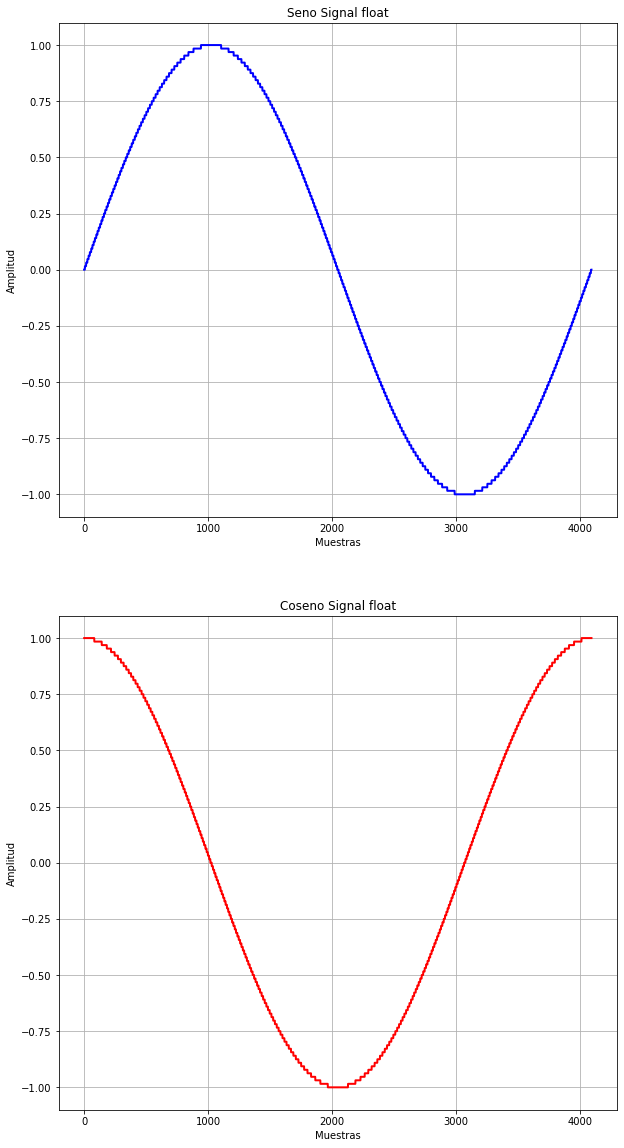

In [41]:
#___________PROBAR_________________#

# vec = ['0','3','5','-1','-8','0','9','-1','-2','2','15','1','-9','0','7']
vec = ['0','3','5','-1','-8','0','9','1','-2','2','15','0','-9','0','7']
partida = 0
for i in range (len(vec)):
    if (vec[i] == '1' or vec[i] == '-1' ):
        partida = i
        break

print("Punto de partida: ", partida)
n = partida

for i in range (len(vec)):

    if (vec[n] == '-1' or vec[n] == '1'):
        print("partida:   ", n, "Vector:   ", vec[n])
    # if  ((partida-1) == 0): n = partida          
    # if  ((partida-1) = 0): n = (partida + 4)-1
    elif(vec[n] != '-1' or vec[n] != '1'):
        print("Constelacion rotada")
        break
    if(((n + 4)) < len(vec)):
        n = (n + 4) 
    else: break    

Punto de partida:  3
partida:    3 Vector:    -1
partida:    7 Vector:    1
Constelacion rotada


In [76]:
N = 1024 
pepe = input('Ingrese los pasos dados: ')
pasos = N//(2**int(pepe))

print(pasos)


16


In [7]:
prueba = -0.0
print(prueba*2)

-0.0


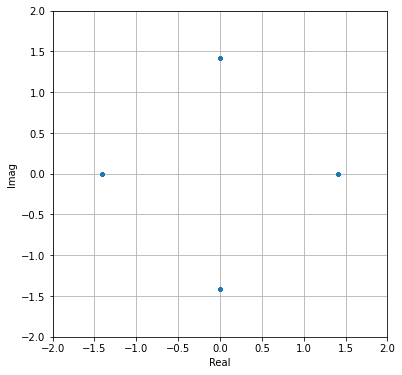

In [9]:
# |______________________________TP9___________________________________|
# | Se tomo como base el tp 6 punto 2 y se le agrego rotacion de       |
# | simbolos, simulando un error en fase con uso de if() como mux      |
# | para posteriormente ser pasado a verilog                           |
# |____________________________________________________________________|

import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *
import SInyCosTab2 as tabla 

#___Variables para simlacion de DSP___#
os             = 4                              # OverSampling
beta           = 0.5                            # Beta                             
Nsymb          = 511                            # Numero de simbolos
T              = 1.0/100e6                      # Periodo de baudio
Ts             = T/os                           # Frecuencia de muestreo
Nfreqs         = 256                            # Cantidad de frecuencias
Nbauds         = 6.0                            # Cantidad de baudios del filtro
PRBSI          = np.array ([1,1,0,1,0,1,0,1,0]) # PRBSI Seed
PRBSQ          = np.array ([1,1,1,1,1,1,1,1,0]) # PRBSQ Seed

SR1            = np.array ([0,0,0,0,0,0])       # Salidas de Signo del FiltroI
SR2            = np.array ([0,0,0,0,0,0])       # Salidas de Signo del FiltroQ

coeficientes   = np.array ( 
    [ 8.95103186e-34,  4.77279499e-03,  1.71488822e-02,  2.27496429e-02,    # Coeficienes del Cos realzado en
    -1.54351892e-16, -5.76127319e-02, -1.20042175e-01, -1.22501738e-01,     # coma flotante
    1.60734027e-15,  2.62503724e-01,  6.00210877e-01,  8.87236072e-01,
    1.00000000e+00,  8.87236072e-01,  6.00210877e-01,  2.62503724e-01,
    -2.94478863e-15, -1.22501738e-01, -1.20042175e-01, -5.76127319e-02,
    7.40915352e-16,  2.27496429e-02,  1.71488822e-02,  4.77279499e-03] 
                           )

berQ                = np.zeros(1024)
berI                = np.zeros(1024)
salidaPRBSI         = []
salidaPRBSQ         = []
salidaPRBSI_sinOS   = []             
salidaPRBSQ_sinOS   = []                
PRBSI_AUX           = []
PRBSQ_AUX           = []
symb_out0Q          = []
symb_out0I          = []
symb_out0I_sinOS    = []
symb_out0Q_sinOS    = []
acumulador_arregloQ = []
acumulador_arregloI = []

contador_berI             = 0
contador_berQ             = 0
acumulador_salida_filtroI = 0
acumulador_salida_filtroQ = 0

#____Cuantizado de los coeficientes del filtro____#
coeficientes = arrayFixedInt(8, 6, coeficientes, signedMode='S', roundMode='round', saturateMode='saturate')
for ptr in range(len(coeficientes)):
    coeficientes[ptr] = coeficientes[ptr].fValue
coeficientes = coeficientes.tolist()   


for j in range(3):
    for i in range(511):

        #___PRBSI___#
        berI     = np.roll(berI,1)
        PRBSI    = np.roll(PRBSI,1)         
        PRBSI[0] = PRBSI[0] ^ PRBSI[5]
        PRBSI_AUX.append(PRBSI[8])
        if PRBSI[8] == 0:
            berI[0] =  0
            salidaPRBSI.append(0)
            salidaPRBSI_sinOS.append(0)
            SalidaPRBSI_actual = 0
        else:
            berI[0] =  1
            salidaPRBSI.append(1)
            salidaPRBSI_sinOS.append(1)
            SalidaPRBSI_actual = 1

        #___PRBSQ___#
        berQ = np.roll(berQ,1)
        PRBSQ    = np.roll(PRBSQ,1)
        PRBSQ[0] = PRBSQ[0] ^ PRBSQ[5]
        PRBSQ_AUX.append(PRBSQ[8])
        if PRBSQ[8] == 0:
            berQ[0] =  0
            salidaPRBSQ.append(0)
            salidaPRBSQ_sinOS.append(0)
            SalidaPRBSQ_actual = 0
        else:
            berQ[0] =  1
            salidaPRBSQ.append(1)
            salidaPRBSQ_sinOS.append(1)
            SalidaPRBSQ_actual = 1

        #___Sobremuestreo___#
        for i in range(os - 1):
            salidaPRBSI.append(0)    
            salidaPRBSQ.append(0)

        #___Toma del signo de los datos a la salida de los filtros___#
        SR1    = np.roll(SR1,1)
        SR1[0] = SalidaPRBSI_actual
        SR2    = np.roll(SR2,1)
        SR2[0] = SalidaPRBSQ_actual
        
        #___Simulacion de filtro polifasico___#
        for entrada_mux in range(4):
            indice = entrada_mux
            for num_mux in range(6):
                salida_mux = coeficientes[indice]
                if (SR1[num_mux] == 0):
                    acumulador_salida_filtroI += salida_mux
                else:
                    acumulador_salida_filtroI += -(salida_mux)
                
                if (SR2[num_mux] == 0):
                    acumulador_salida_filtroQ += salida_mux
                else:
                    acumulador_salida_filtroQ += -(salida_mux)
                indice += 4

            aux_symb_outI = acumulador_salida_filtroI
            aux_symb_outQ = acumulador_salida_filtroQ

            acumulador_salida_filtroI = 0
            acumulador_salida_filtroQ = 0           

            #___Salida de 4 datos por filtro en cada ciclo de relog___#
            symb_out0I.append(aux_symb_outI)
            symb_out0Q.append(aux_symb_outQ)
            
            #___Slizer  y contador de BERQ e I___#
            if (entrada_mux == 0):

                symb_out0I_sinOS.append(aux_symb_outI)
                symb_out0Q_sinOS.append(aux_symb_outQ)

                if aux_symb_outI >= 0:
                    slicerI = 0
                else:
                    slicerI = 1
                contador_berI = contador_berI + (slicerI ^ int(berI[j]))
                
                if aux_symb_outQ >= 0:
                    slicerQ = 0
                else:
                    slicerQ = 1
                contador_berQ = contador_berQ + (slicerQ ^ int(berQ[j]))
                
    #___Busqueda de la latencia minima___#
    acumulador_arregloI.append(contador_berI)
    if (contador_berI == 0):
        print("Latencia minima en I:",j) 
    
    acumulador_arregloQ.append(contador_berQ)
    if (contador_berQ == 0):
        print("Latencia minima en Q:",j)
           
    #___Reseteo de variables___#
    if (j == 1022):
        salidaPRBSI      .clear()
        salidaPRBSQ      .clear()
        salidaPRBSI_sinOS.clear()
        salidaPRBSQ_sinOS.clear()
        PRBSI_AUX        .clear()
        PRBSQ_AUX        .clear()
        symb_out0Q       .clear()
        symb_out0I       .clear()
        symb_out0I_sinOS .clear()
        symb_out0Q_sinOS .clear()
    
    contador_berI = 0
    contador_berQ = 0       

#___Cuantizado de datos a la salida del las BER'S___#       
symb_out0Q       = arrayFixedInt(8, 6, symb_out0Q, signedMode='S', roundMode='round', saturateMode='saturate')
symb_out0I       = arrayFixedInt(8, 6, symb_out0I, signedMode='S', roundMode='round', saturateMode='saturate')
symb_out0Q_sinOS = arrayFixedInt(8, 6, symb_out0Q_sinOS, signedMode='S', roundMode='round', saturateMode='saturate')
symb_out0I_sinOS = arrayFixedInt(8, 6, symb_out0I_sinOS, signedMode='S', roundMode='round', saturateMode='saturate')


for ptr in range(len(symb_out0Q)):
    symb_out0Q[ptr]       = symb_out0Q[ptr].fValue
    symb_out0I[ptr]       = symb_out0I[ptr].fValue

for ptr in range(len(symb_out0Q_sinOS)):    
    symb_out0Q_sinOS[ptr] = symb_out0Q_sinOS[ptr].fValue 
    symb_out0I_sinOS[ptr] = symb_out0I_sinOS[ptr].fValue  


#__Generacion de ruido___#
noiseI = (np.random.uniform(0, 0.1, np.size(symb_out0I)))    
noiseQ = (np.random.uniform(0, 0.1, np.size(symb_out0I)))

#___Ruido montado en ambas salidas___#
# symb_out0Q = symb_out0Q + noiseQ
# symb_out0I = symb_out0I + noiseI                           

Xrvec   =   []
Xivec   =   []

for i in range (900):
    Xrvec.append((symb_out0I[i] * np.cos(25*(np.pi/180))) - (symb_out0Q[i] * np.sin(25*(np.pi/180)))) 
    Xivec.append((symb_out0I[i] * np.sin(25*(np.pi/180))) + (symb_out0Q[i] * np.cos(25*(np.pi/180))))


# Xrvec               = np.array( Xrvec )
# Xivec               = np.array( Xivec )

salidaPRBSI         = np.array( salidaPRBSI       )
salidaPRBSQ         = np.array( salidaPRBSQ       )
salidaPRBSI_sinOS   = np.array( salidaPRBSI_sinOS )
salidaPRBSQ_sinOS   = np.array( salidaPRBSQ_sinOS )
PRBSI_AUX           = np.array( PRBSI_AUX         )
PRBSQ_AUX           = np.array( PRBSQ_AUX         )
symb_out0Q          = np.array( symb_out0Q        )
symb_out0I          = np.array( symb_out0I        )
symb_out0I_sinOS    = np.array( symb_out0I_sinOS  )
symb_out0Q_sinOS    = np.array( symb_out0Q_sinOS  )

offset = 0

#___Ploteo___#
plt.figure(figsize=[6,6])
plt.plot(Xrvec[offset:len(Xrvec)-(offset):int(os)],
         Xivec[offset:len(Xivec)-(offset):int(os)],
             '.',linewidth=2.0)
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()
